### Plot temporal seismicity distribution with
1. profile line
2. self-define earthquake

/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:1192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog.loc[:, 'size'] = catalog['magnitude'].apply(_get_size)


Removing text: ALS
Removing text: CHK
Removing text: ECB
Removing text: ELD
Removing text: SML
Removing text: WFEN
Removing text: WPL
Removing text: YUS
Removing text: SSLB
Removing text: SYNB
Removing text: YULB
Removing text: TPUB
Removing text: LYUB
Removing text: FUSB
Removing text: WHP
Removing text: WCS
Removing text: WJS
Removing text: WHY
Removing text: WDLH
Removing text: WCKO
Removing text: STYH
Removing text: EHD
Removing text: LONT
Removing text: EDH
Removing text: EYUL
Removing text: CHKH
Removing text: LDU
Removing text: EOS3
Removing text: EOS4


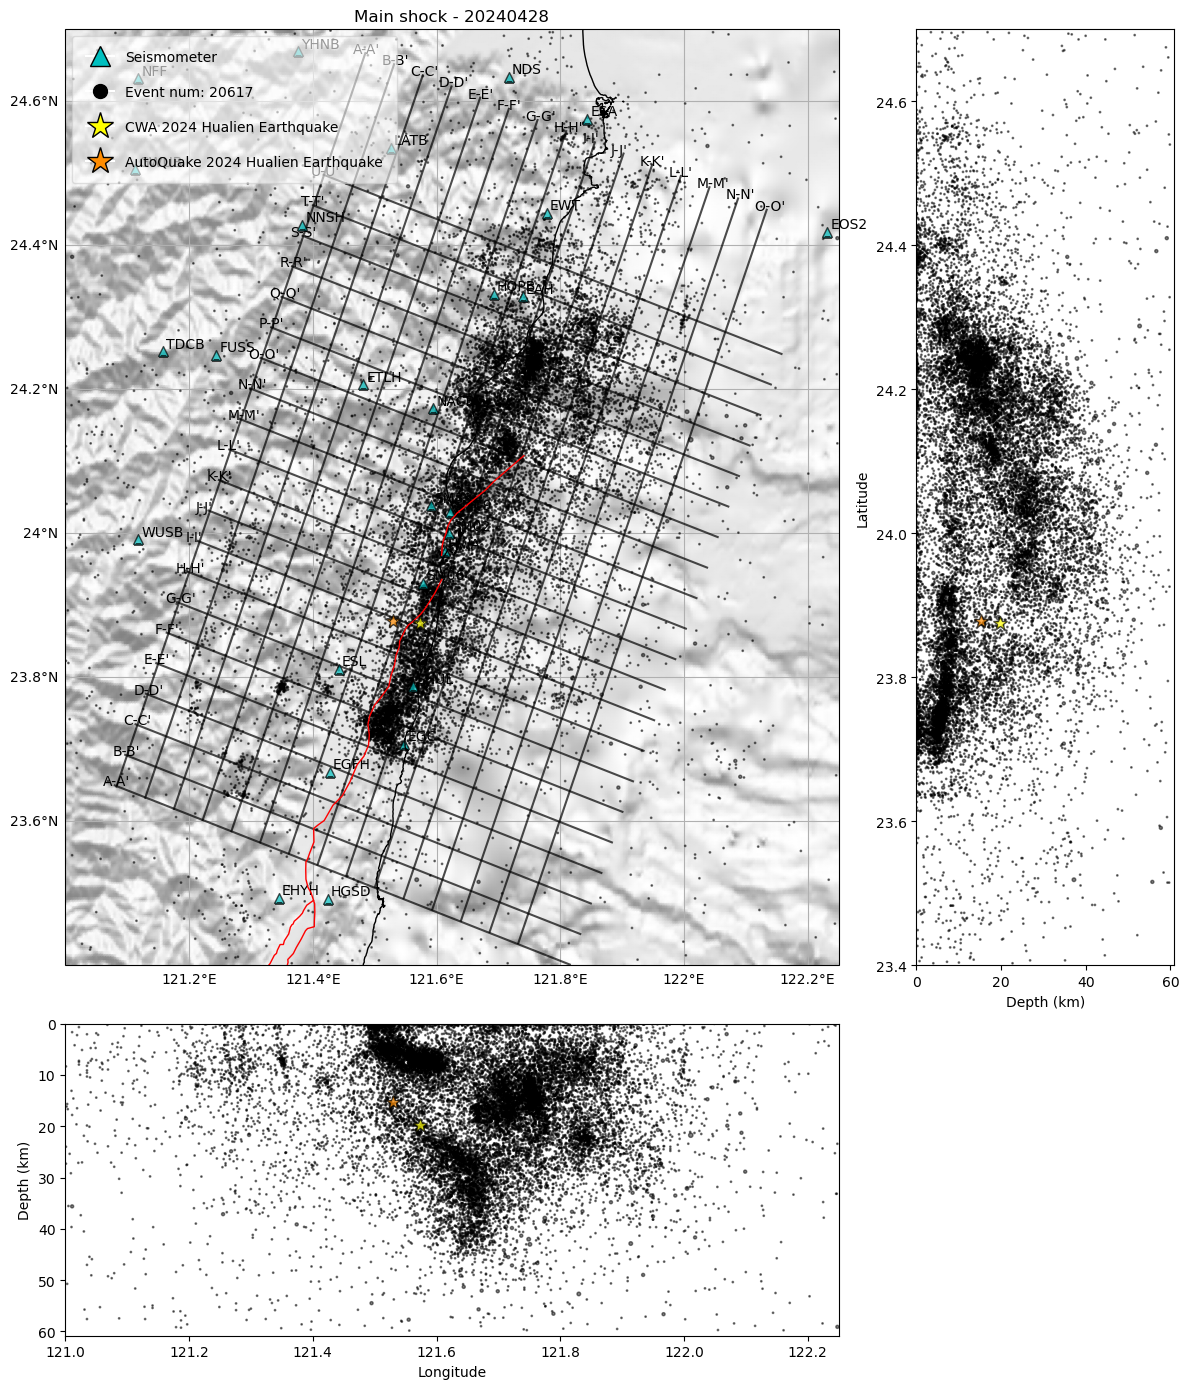

In [1]:
from pathlib import Path
import pandas as pd
from autoquake.visualization.check_plot import (
    plot_mapview_temp,
)

catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events.csv')
catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events_0403_0428.csv')
df_catalog = pd.read_csv(catalog)
df_catalog.rename(columns={'depth': 'depth_km'}, inplace=True)
gdms_eq = (121.573, 23.875, 19.72, 'CWA 2024 Hualien Earthquake', 'yellow')
autoquake_eq = (121.529, 23.878, 15.37, 'AutoQuake 2024 Hualien Earthquake', 'darkorange')
ruisui_eq = (121.348, 23.575, 15.04, '20131031 Ruisui Earthquake', 'pink')
fengline_eq = (121.421, 23.727, 17.03, '20140521 Fenglin Earthquake', 'olive')
hualien_2018 = (121.746, 24.094, 6.25, '20180206 Hualien Earthquake', 'brown')
hualien_2019 = (121.558, 24.059, 20.2, '20190418 Hualien Earthquake', 'purple')
hualien_2020 = (121.506, 23.835, 10.77, '20200215 Hualien Earthquake', 'red')
hualien_20210418_1 = (121.484, 23.876, 16.23, '20210418 Hualien Earthquake - 1', 'lime')
hualien_20210418_2 = (121.469, 23.862, 14.95, '20210418 Hualien Earthquake - 2', 'blue')
hualien_20210707 = (121.594, 23.883, 9.08, '20210707 Hualien Earthquake', 'c')
# eq_list = [gdms_eq, autoquake_eq, ruisui_eq, fengline_eq, hualien_2018, hualien_2019, hualien_2020, hualien_20210418_1, hualien_20210418_2, hualien_20210707]
eq_list = [gdms_eq, autoquake_eq]
catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.4,
    'max_lat': 24.7,
    'min_depth': 0,
    'max_depth': 60,
}

plot_mapview_temp(
    station=Path('/home/patrick/Work/Hualien0403/Paper/station.csv'),
    catalog=df_catalog,
    catalog_filter_=catalog_filter_,
    eq_list=eq_list,
    title='Main shock - 20240428',
    fig_dir=Path('/home/patrick/Work/Hualien0403/Paper'),
    savename='test',
    # temporal=True, # True for plot it all
    plot_profile_line=True, # True for plot line
)

### Distance calculation

In [ ]:
import numpy as np
from pyproj import Geod
from pathlib import Path
def discount(lons, lats, center_lons=121.573, center_lats=23.875):
    geod = Geod(ellps='WGS84')
    center_lons_array = np.full(len(lons), center_lons)
    center_lats_array = np.full(len(lats), center_lats)
    _, _, dis = geod.inv(lons, lats, center_lons_array, center_lats_array)
    return dis / 1000
station = Path('')
df_sta = pd.read_csv(station)
df_sta['dis'] = discount(df_sta['longitude'].values, df_sta['latitude'].values)

### Plotting station status

In [ ]:
from datetime import datetime, timedelta
from glob import glob

from obspy import UTCDateTime
from obspy.imaging.scripts.scan import Scanner


def date_range(start_ymd, end_ymd):
    """## Get date range from start_ymd to end_ymd

    This step is to generate a list of dates in the format of '%Y%m%d' for parallel processing.

    Reutrn:
        - date_list (list): List of dates in the format of '%Y%m%d'
    """
    start_date = datetime.strptime(start_ymd, '%Y%m%d')
    end_date = datetime.strptime(end_ymd, '%Y%m%d')
    delta = end_date - start_date
    date_list = []
    for i in range(delta.days + 1):
        date = start_date + timedelta(days=i)
        date_list.append(date.strftime('%Y%m%d'))
    return date_list
def seis_status(target_dir, output_file, starttime='20240401', endtime='20240428'):
    utc_starttime = UTCDateTime(starttime)
    utc_endtime = UTCDateTime(endtime)
    scanner = Scanner()
    date_list = date_range(starttime, endtime)
    for date in date_list:
        print(date)
        for i in glob(f"{target_dir}/{date}/*"):  # change it when this is first time.
            print(i)
            scanner.parse(i)
    scanner.plot(
        starttime=utc_starttime,
        endtime=utc_endtime,
        outfile=output_file,
        print_gaps=True,
    )
    
start_ymd = '20240401'
end_ymd = '20240428'
seis_status(
    target_dir='/home/patrick/Work/Hualien0403/data_parent_dir',
    starttime=start_ymd,
    endtime=end_ymd,
    output_file='/home/patrick/Work/Hualien0403/Paper/seis_status/status.png'
)

### Plot Magnitude along with the datetime

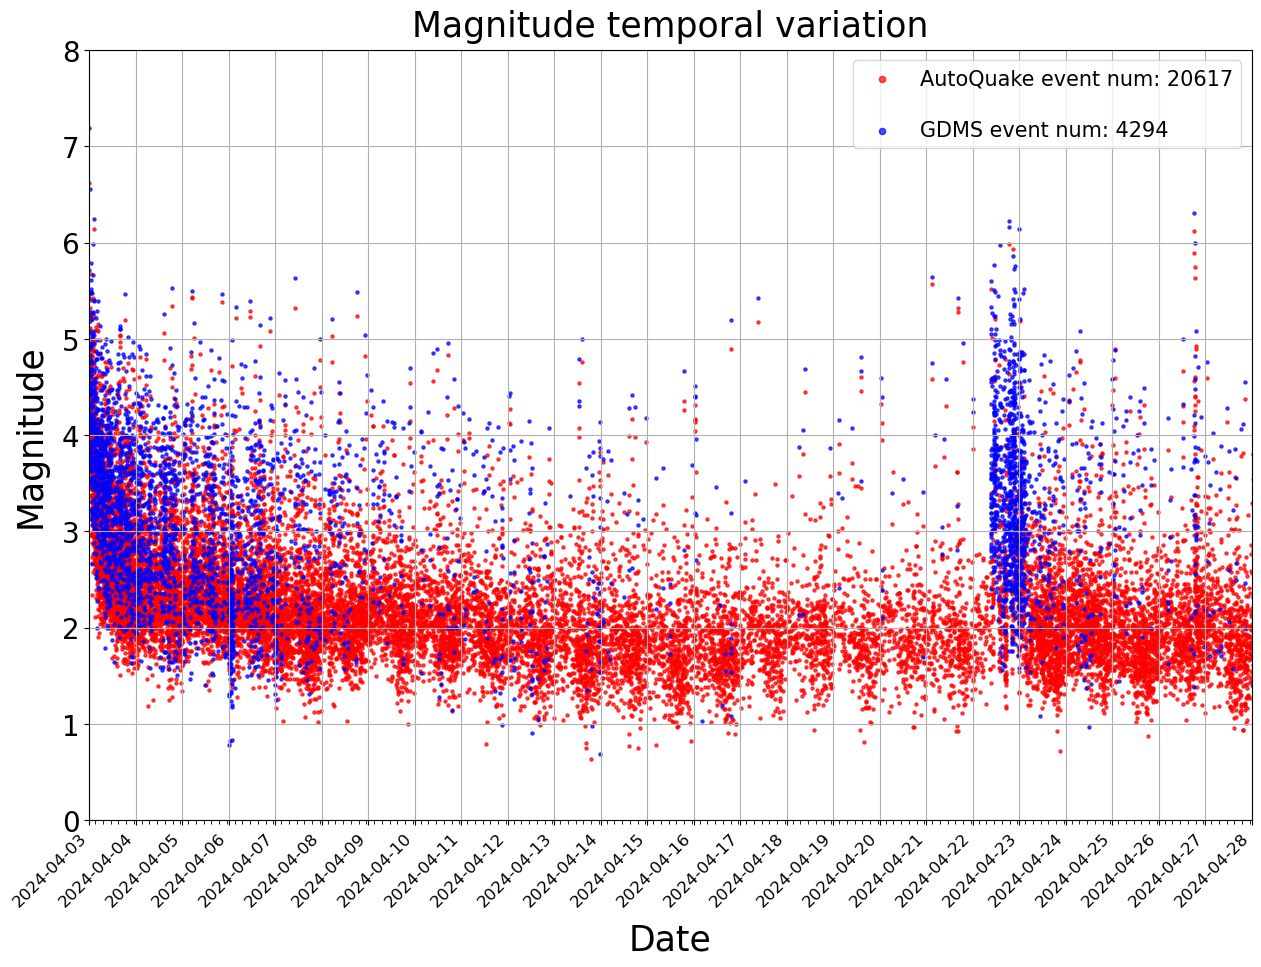

In [3]:
from autoquake.visualization.check_plot import get_mags_dist
from autoquake.visualization._plot_base import catalog_filter
from pathlib import Path
import pandas as pd
gdms_catalog = Path('/home/patrick/Work/Hualien0403/CWA/GDMS_0403_0428.csv')
catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events_0403_0428.csv')
catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.4,
    'max_lat': 24.7,
    'min_depth': 0,
    'max_depth': 60,
}
df_catalog = pd.read_csv(catalog)
df_catalog = catalog_filter(catalog_df=df_catalog, h3dd_mode=False, catalog_range=catalog_filter_)
gdms = pd.read_csv(gdms_catalog)
gdms['time'] = gdms.apply(lambda row: f"{row['date']}T{row['time']}", axis=1)
gdms = catalog_filter(catalog_df=gdms, h3dd_mode=False, catalog_range=catalog_filter_)
# df_catalog.rename(columns={'utctime': 'time'}, inplace=True)
get_mags_dist(
    df_list=[df_catalog, gdms],
    color_list=['r', 'b'],
    name_list=['AutoQuake', 'GDMS'],
    start_date='2024-04-02T23:58:00',
    end_date='2024-04-28',
    fig_dir=Path('/home/patrick/Work/Hualien0403/Paper')
)

## Profile

### Daily profile
From 0401 (day1) - 0417 (day17)

Next Center: (121.44807055698034, 23.526037276615295)
[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.464821764653, 23.568459759336232)
[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.48158373564043, 23.61088020444271)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.49835649815041, 23.653298606837534)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.51514008044616, 23.695714961414293)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.5319345108465, 23.738129263057317)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.54873981772606, 23.78054150664166)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.56555602951546, 23.822951687033054)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.58238317470148, 23.86535979908788)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.59922128182727, 23.90776583765315)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.61607037949248, 23.950169797566435)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.63293049635357, 23.992571673655863)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.64980166112383, 24.03497146074008)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.66668390257371, 24.077369153628215)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.68357724953094, 24.11976474711983)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.70048173088072, 24.162158236004917)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.71739737556595, 24.204549615063836)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.7343242125874, 24.246938879067283)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.75126227100382, 24.289326022776276)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.76821157993233, 24.3317110409421)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]
Next Center: (121.7851721685484, 24.374093928306277)


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


[    0 12000 24000 36000 48000 60000 72000 80000]


/data2/patrick/AutoQuake/autoquake/visualization/check_plot.py:2088: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


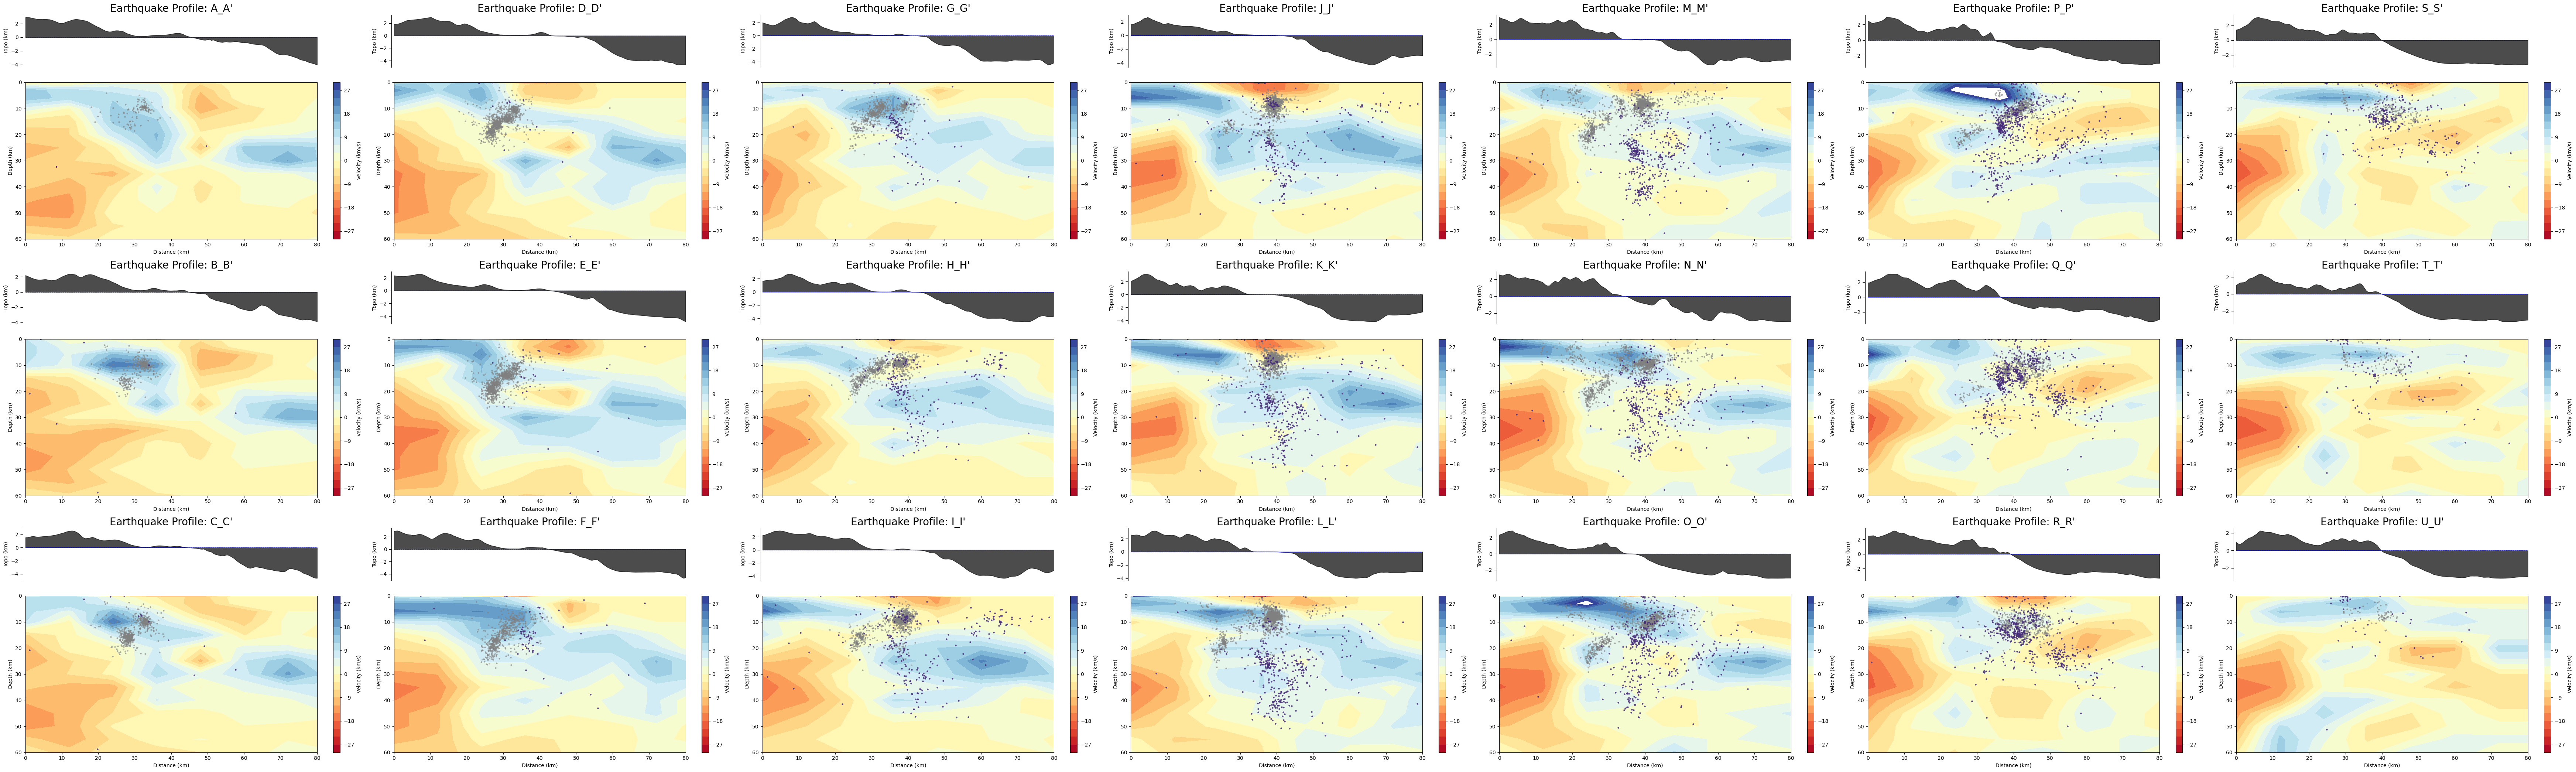

In [1]:
from pathlib import Path
from pyproj import Geod
import pandas as pd

from autoquake.visualization.check_plot import (
    daily_profile
)

# init_point  = (121.08, 23.65)
# geod = Geod(ellps='WGS84')
# init_center = geod.fwd(init_point[0], init_point[1], 110, 40*1000)
# center = (init_center[0], init_center[1])
hhh_catalog = Path('/home/patrick/Work/Hualien0403/HsinHua_reloc/reloc_events.csv')
catalog = Path('/home/patrick/Work/Hualien0403/only_seismometer_version_1/20240401_20240417/Magnitude_cutoff_0_2/mag_events.csv')

df_catalog = pd.read_csv(catalog)
df_catalog.rename(columns={'depth': 'depth_km'}, inplace=True)
df_catalog = df_catalog[df_catalog['day'] == 3]
vel_txt = Path('/home/patrick/Work/Hualien0403/Paper/huang2014.txt')
topo_csv = Path('/home/patrick/Work/Hualien0403/Paper/topo_small_region.csv')
daily_profile(
    df_catalog=df_catalog,
    other_catalog=pd.read_csv(hhh_catalog),
    topo_csv=topo_csv,
    save_dir=Path('/home/patrick/Work/Hualien0403/Paper'),
    plot_vel=True,
    vel_txt=vel_txt,
    # vel_cmap='seismic'
)

In [ ]:
import numpy as np
import string
letters = string.ascii_uppercase
from pathlib import Path
from pyproj import Geod
import pandas as pd

from autoquake.visualization.check_plot import (
    mapview_with_profile
)
horizontal_start_point=(121.08, 23.65)
horizontal_movement={
    'length': 10,
    'width': 80,
    'azimuth': 20,
    'steps': np.linspace(0, 100, 21),
    'letters': letters[0:21]
    }
vertical_start_point=(121.485, 24.667),
vertical_movement={
    'length': 10,
    'width': 120,
    'azimuth': 110,
    'steps': np.linspace(0, 70, 15),
    'letters': letters[0:15]
    }
target_start_point=(121.485, 24.667),
target_movement={
    'length': 10,
    'width': 120,
    'azimuth': 110,
    'steps': np.linspace(0, 70, 15),
    'letters': letters[0:15]
    }
hhh_catalog = Path('/home/patrick/Work/Hualien0403/HsinHua_reloc/reloc_events.csv')
# catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events.csv')
catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events_0403_0428.csv')

df_catalog = pd.read_csv(catalog)
df_catalog.rename(columns={'depth': 'depth_km'}, inplace=True)
gdms_eq = (121.573, 23.875, 19.72, 'CWA 2024 Hualien Earthquake', 'yellow')
autoquake_eq = (121.529, 23.878, 15.37, 'AutoQuake 2024 Hualien Earthquake', 'darkorange')
# ruisui_eq = (121.348, 23.575, 15.04, '20131031 Ruisui Earthquake', 'pink')
# fengline_eq = (121.421, 23.727, 17.03, '20140521 Fenglin Earthquake', 'olive')
# hualien_2018 = (121.746, 24.094, 6.25, '20180206 Hualien Earthquake', 'brown')
# hualien_2019 = (121.558, 24.059, 20.2, '20190418 Hualien Earthquake', 'purple')
# hualien_2020 = (121.506, 23.835, 10.77, '20200215 Hualien Earthquake', 'red')
# hualien_20210418_1 = (121.484, 23.876, 16.23, '20210418 Hualien Earthquake - 1', 'lime')
# hualien_20210418_2 = (121.469, 23.862, 14.95, '20210418 Hualien Earthquake - 2', 'blue')
# hualien_20210707 = (121.594, 23.883, 9.08, '20210707 Hualien Earthquake', 'c')
# eq_list = [gdms_eq, autoquake_eq, ruisui_eq, fengline_eq, hualien_2018, hualien_2019, hualien_2020, hualien_20210418_1, hualien_20210418_2, hualien_20210707]
eq_list = [gdms_eq, autoquake_eq]
catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.4,
    'max_lat': 24.7,
    'min_depth': 0,
    'max_depth': 60,
}
vel_txt = Path('/home/patrick/Work/Hualien0403/Paper/huang2014.txt')
topo_csv = Path('/home/patrick/Work/Hualien0403/Paper/topo_small_region.csv')
save_dir = Path('/home/patrick/Work/Hualien0403/Paper/profile_test')
save_dir.mkdir(parents=True, exist_ok=True)
mapview_with_profile(
    station=Path('/home/patrick/Work/Hualien0403/Paper/station.csv'),
    topo_csv=topo_csv,
    catalog=df_catalog,
    other_catalog=pd.read_csv(hhh_catalog),
    catalog_filter_=catalog_filter_,
    title='Main shock - 20240428',
    eq_list=eq_list,
    fig_dir=save_dir,
    savename='testt',
    plot_profile_line=True,
    horizontal_start_point=horizontal_start_point,
    horizontal_movement=horizontal_movement,
    vertical_start_point=vertical_start_point,
    vertical_movement=vertical_movement,
    target_start_point=target_start_point,
    target_movement=target_movement,
    vel_txt=vel_txt
)

### Whole event profile

In [ ]:
import string
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Geod
from autoquake.visualization.check_plot import (
    add_single_profile,
    project_events_to_profile,
)
init_point  = (121.08, 23.65)
geod = Geod(ellps='WGS84')
init_center = geod.fwd(init_point[0], init_point[1], 110, 40*1000)
center = (init_center[0], init_center[1])

catalog = Path('/home/patrick/Work/Hualien0403/only_seismometer_version_1/20240401_20240417/Magnitude_cutoff_0_2/mag_events.csv')
df_catalog = pd.read_csv(catalog)
df_catalog.rename(columns={'depth': 'depth_km'}, inplace=True)


profile_nums = 21
num_rows = 3
num_columns = profile_nums // num_rows
fig_profile = plt.figure(figsize=(num_columns * 10, num_rows * 6))
gs = gridspec.GridSpec(num_rows, num_columns, figure=fig_profile)

letters = string.ascii_uppercase
for i, (dis, letter) in enumerate(zip(np.linspace(0, 100, 21), letters[0:21])):
    geod = Geod(ellps='WGS84')
    next_lon, next_lat, _ = geod.fwd(center[0], center[1], 20, dis*1000)
    print(next_lon, next_lat)
    new_center = (next_lon, next_lat)
    profile_events = project_events_to_profile(df_catalog, center=new_center, azimuth=20)
    row = i % 3
    col = i // 3
    ax = fig_profile.add_subplot(gs[row, col])
    add_single_profile(profile_events, ax, profile=letter)
plt.tight_layout()
plt.savefig('/home/patrick/Work/Hualien0403/Paper/gridspec_cmap.png', dpi=300)

### Focal on map

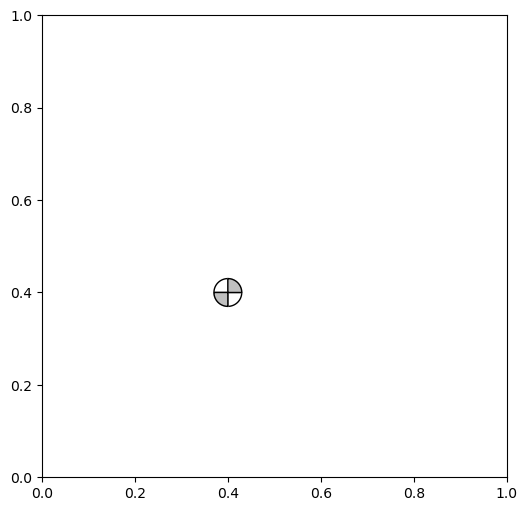

In [9]:
import matplotlib.pyplot as plt
from pyrocko import moment_tensor as pmt
from pyrocko.plot import beachball, mpl_color

fig, ax = plt.subplots(figsize=(6, 6))
mt = pmt.MomentTensor(
    strike=0,
    dip=90,
    rake=0,
)

beachball.plot_beachball_mpl(mt, ax, size=20, beachball_type='full',
                             position=(0.4, 0.4), linewidth=1, color_t=mpl_color('silver'))

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from autoquake.visualization._plot_base import (
    catalog_filter,
    get_mapview,
    plot_station,
    station_mask,
)
from autoquake.visualization.check_plot import _get_size, _add_epicenter


def plot_mapview_temp(
    station: Path,
    catalog: pd.DataFrame,
    catalog_filter_: dict | None = None,
    title='Event distribution',
    main_eq=(0, 0, 0),
    h3dd_main_eq_c0_c2=(121.529, 23.878, 15.37),
    another_eq_1=(121.509, 24.077, 22.90),
    another_eq_2=(121.767, 23.817, 10.0),
    another_eq_3=(121.586, 23.994, 44.93),
    another_eq_4=(121.918, 24.384, 25.98),
    gdms_main_eq=(0, 0, 0),
    main_eq_size=10,
    plot_station_name=True,
    plot_event_name=True,
    station_mask=station_mask,
    savefig=True,
    fig_dir: Path | None = None,
    plot_profile=True,
    h3dd_mode=False,
    prefix='',
    savename='',
):
    """
    catalog should at least contains the lon and lat.

    """
    # plot setting
    fig, axes = plt.subplots(
        2,
        2,
        figsize=(12, 14),
        gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [3, 1]},
    )
    geo_ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
    # fig, geo_ax = plt.subplots(
    #     1, 1, figsize=(12, 14), subplot_kw={'projection': ccrs.PlateCarree()}
    # )

    # sub_ax = fig.add_subplot(4, 4, 1, projection=ccrs.PlateCarree())

    # base_map
    if catalog_filter_ is None:
        region = [
            catalog['longitude'].min() - 0.2,
            catalog['longitude'].max() + 0.2,
            catalog['latitude'].min() - 0.2,
            catalog['latitude'].max() + 0.2,
        ]
    else:
        region = [
            catalog_filter_['min_lon'],
            catalog_filter_['max_lon'],
            catalog_filter_['min_lat'],
            catalog_filter_['max_lat'],
        ]
    get_mapview(region=region, ax=geo_ax, title=title)
    # ax setting
    geo_ax.set_xlim(region[0], region[1])
    geo_ax.set_ylim(region[2], region[3])
    # trim the catalog
    catalog = catalog_filter(
        catalog_df=catalog, h3dd_mode=h3dd_mode, catalog_range=catalog_filter_
    )
    # get the size corresponding to magnitude
    catalog.loc[:, 'size'] = catalog['magnitude'].apply(_get_size)
    # station
    df_station = pd.read_csv(station)
    # print(
    #     'Geo Axes Patch Extent:',
    #     geo_ax.get_window_extent(renderer=fig.canvas.get_renderer()),
    # )
    plot_station(
        df_station=df_station,
        geo_ax=geo_ax,
        region=region,
        plot_station_name=plot_station_name,
        text_dist=0.005,
    )
    manual_elements = [
        Line2D(
            [0],
            [0],
            marker='^',
            color='w',
            label='Seismometer',
            markersize=7,
            markerfacecolor='c',
            markeredgecolor='k',
        )
    ]
    # add all events
    event_num = len(catalog)
    if h3dd_mode:
        prefix = 'h3dd_'

    color_map = {
        0: 'green',
        1: 'purple',
    }
    label_map = {
        0: 'After Main shock (2024-04-02T23:58:10)',
        1: 'Before Main shock (2024-04-02T23:58:10)',
    }

    for event_type, group in catalog.groupby('event_type'):
        num = len(group)
        group = group.sort_values(by='size', ascending=True)
        geo_ax.scatter(
            group[f'{prefix}longitude'],
            group[f'{prefix}latitude'],
            s=group['size'],
            c=color_map[event_type],
            alpha=0.5,
            label=f'{label_map[event_type]}: {num}',
            rasterized=True,
            zorder=3 + abs(int(event_type) - 4),
        )
        if plot_event_name:
            for _, row in group.iterrows():
                geo_ax.text(
                    x=row[f'{prefix}longitude'],
                    y=row[f'{prefix}latitude'],
                    s=row['event_index'],
                )
        if plot_profile:
            axes[0, 1].scatter(
                group[f'{prefix}depth_km'],
                group[f'{prefix}latitude'],
                s=group['size'],
                c=color_map[event_type],
                alpha=0.5,
                # label=label_map[event_type],
                rasterized=True,
                zorder=3 + abs(int(event_type) - 4),
            )
            axes[1, 0].scatter(
                group[f'{prefix}longitude'],
                group[f'{prefix}depth_km'],
                s=group['size'],
                c=color_map[event_type],
                alpha=0.5,
                # label=label_map[event_type],
                rasterized=True,
                zorder=3 + abs(int(event_type) - 4),
            )
        manual_elements.append(
            Line2D(
                [0],
                [0],
                marker='o',
                color='w',
                label=f'{label_map[event_type]}: {num}',
                markersize=3,
                markerfacecolor=color_map[event_type],
                markeredgecolor='k',
                alpha=0.5,
            )
        )
    # geo_ax.autoscale(tight=True)
    geo_ax.set_aspect('auto')
    geo_ax.legend(
        handles=manual_elements,  # + legend_elements,
        loc='upper left',
        markerscale=2,
        labelspacing=1.5,
        borderpad=1,
        fontsize=10,
        framealpha=0.6,
    )
    # geo_ax.add_artist(legend)
    xlim = geo_ax.get_xlim()
    ylim = geo_ax.get_ylim()
    axes[0, 1].autoscale(tight=True)
    axes[0, 1].set_ylim(ylim)
    axes[0, 1].set_xlim([0, catalog['depth_km'].max() + 1])
    # axes[0, 1].set_xlim([0, 62])  # gdms
    axes[0, 1].set_xlabel('Depth (km)')
    axes[0, 1].set_ylabel('Latitude')

    axes[1, 0].autoscale(tight=True)
    axes[1, 0].set_xlim(xlim)
    axes[1, 0].set_ylim([0, catalog['depth_km'].max() + 1])
    # axes[1, 0].set_ylim([0, 62])  # gdms
    axes[1, 0].invert_yaxis()
    axes[1, 0].set_ylabel('Depth (km)')
    axes[1, 0].set_xlabel('Longitude')
    axes[1, 1].axis('off')
    axes[0, 0].axis('off')
    plt.tight_layout()
    if savefig and fig_dir is not None:
        plt.savefig(fig_dir / f'{savename}.png', dpi=300, bbox_inches='tight')

station_seis = Path('/home/patrick/Work/Hualien0403/stations/station_seis.csv')
fig_dir = Path('/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_main_eq')
start_time = '2024-03-01T00:00:00'
end_time = '2024-04-03T00:00:00'
# save_name = f'{start_time[:10].replace("-", "")}_{end_time[:10].replace("-", "")}'
cwa_main_eq = (121.57, 23.88, 22.5)
gdms_eq = (121.573, 23.875, 19.72)
autoquake_eq = (121.529, 23.878, 15.37)
mag_events = Path(
    '/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_main_eq/20240301_20240417_mag_catalog.csv'
)

catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.5,
    'max_lat': 24.5,
    'min_depth': 0,
    'max_depth': 60,
}

df_seis = pd.read_csv(mag_events)
df_seis = catalog_filter(df_seis, catalog_range=catalog_filter_, h3dd_mode=False)
df_seis['datetime'] = pd.to_datetime(df_seis['time'])
df_seis['event_type'] = df_seis['datetime'].apply(lambda x: 0 if x >= pd.Timestamp('2024-04-02T23:58:11') else 1)
df_seis = df_seis[
    (df_seis['datetime'] >= pd.Timestamp(start_time))
    & (df_seis['datetime'] <= pd.Timestamp(end_time))
]

### Plot all fault

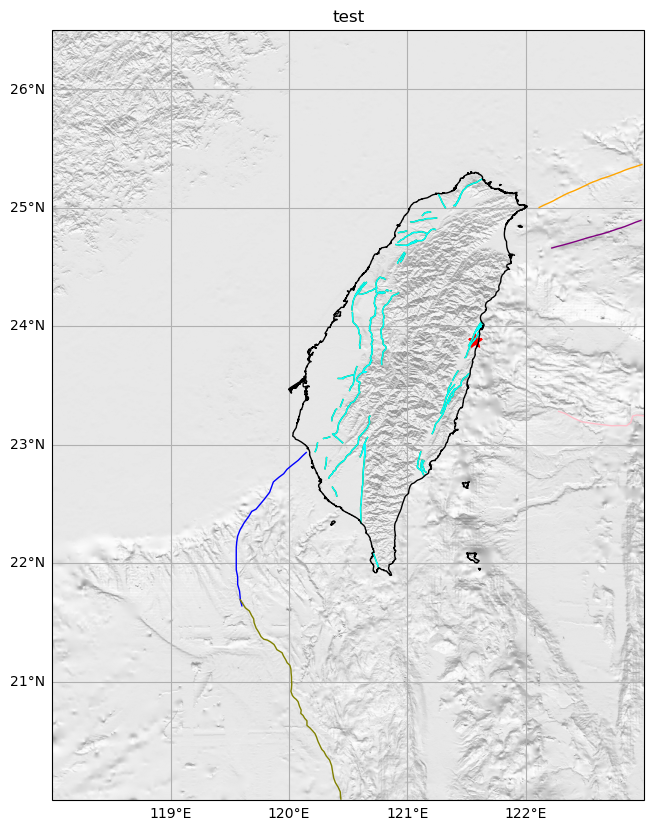

In [9]:
from pathlib import Path
from autoquake.visualization._plot_base import get_mapview, add_fault, check_format
from pyrocko import moment_tensor as pmt
from pyrocko.plot import beachball, mpl_color
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

map_proj = ccrs.PlateCarree()
tick_proj = ccrs.PlateCarree()

geo_map = Path('/home/patrick/Work/AutoQuake/geo_map/hualien_structure.txt')
gafocal_txt = Path('/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_20240331/gafocal_catalog.txt')
tw_coast = Path('/home/patrick/Work/AutoQuake/geo_map/tw_coast.txt')

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw=dict(projection=map_proj),
)
get_mapview(
    region=[118.0, 123.0, 20, 26.5],
    ax=ax,
    title='test'
)

add_fault(ax=ax, color='b', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/Manila_front.dat'))
add_fault(ax=ax, color='olive', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/Manila_trench.dat'))
add_fault(ax=ax, color='orange', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/Okinawa_1_solid.gmt'))
add_fault(ax=ax, color='green', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/fault.txt'))
add_fault(ax=ax, color='purple', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/Okinawa_2_solid.gmt'))
add_fault(ax=ax, color='cyan', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/fault1.txt'))
add_fault(ax=ax, color='pink', fault_txt=Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/Ryukyu_trench.dat'))

ax.scatter(121.573, 23.875, s=100, c='r', marker='*', label='GDMS')
# ax.legend()



### Fault data processing

In [7]:
output = Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/fault1.txt')
input = Path('/home/patrick/Work/AutoQuake/autoquake/visualization/geo_map/fault1.dat')
with open(input, 'r') as f:
    lines = f.readlines()
with open(output, 'w') as f:
    fault_number = -1
    for line in lines:
        if line.startswith('X'):
            fault_number += 1
            f.write(f'#|{fault_number}|\n')
        else:
            lon = line.strip().split()[0]
            lat = line.strip().split()[1]
            f.write(f'{lon} {lat}\n')

### Plot migration

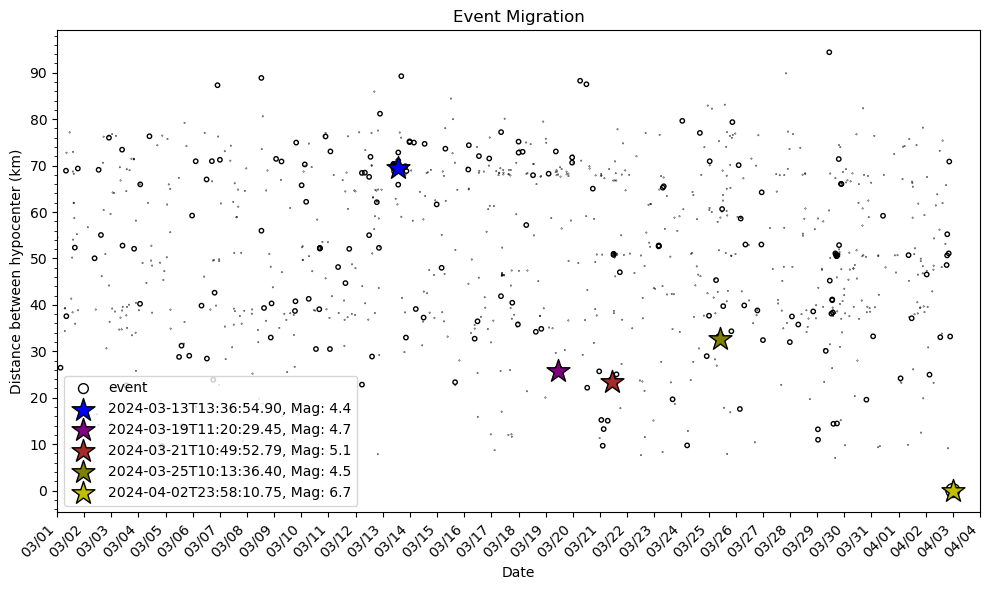

In [7]:
import math
import pandas as pd
from pathlib import Path
from pyproj import Geod
from autoquake.visualization._plot_base import catalog_filter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# Points with latitude, longitude, and depth (negative height)
def calculate_3d_distance(
    event_lon: float,
    event_lat: float,
    event_depth: float,
    epicenter=(121.529, 23.878, 15.37),
):
    """
    Calculate the 3D distance between two points given lon, lat, and depth.

    Args:
        lon1, lat1, depth1: Coordinates of the first point (depth in meters).
        lon2, lat2, depth2: Coordinates of the second point (depth in meters).

    Returns:
        3D distance in meters.
    """
    geod = Geod(ellps='WGS84')
    epi_lon, epi_lat, epi_depth = epicenter
    # Calculate 2D geodetic distance
    _, _, distance_2d = geod.inv(epi_lon, epi_lat, event_lon, event_lat)

    # Calculate the depth difference
    depth_diff = epi_depth - event_depth

    # Calculate 3D distance using Pythagoras theorem
    distance_3d = math.sqrt((distance_2d / 1000) ** 2 + depth_diff**2)

    return distance_3d

def calculate_2d_distance(
    event_lon: float,
    event_lat: float,
    epicenter=(121.529, 23.878, 15.37),
):
    """
    Calculate the 3D distance between two points given lon, lat, and depth.

    Args:
        lon1, lat1, depth1: Coordinates of the first point (depth in meters).
        lon2, lat2, depth2: Coordinates of the second point (depth in meters).

    Returns:
        3D distance in meters.
    """
    geod = Geod(ellps='WGS84')
    epi_lon, epi_lat, epi_depth = epicenter
    # Calculate 2D geodetic distance
    _, _, distance_2d = geod.inv(epi_lon, epi_lat, event_lon, event_lat)


    # Calculate 3D distance using Pythagoras theorem
    distance_2d = distance_2d / 1000

    return distance_2d

def plot_migration(
    catalog: Path,
    catalog_range: dict,
    dist_calulate_method='3d',
    start_time: str | None = None,
    end_time: str | None = None
    ):
    df =pd.read_csv(catalog)
    method_map = {
        '2d': lambda row: calculate_2d_distance(row['longitude'], row['latitude']),
        '3d': lambda row: calculate_3d_distance(row['longitude'], row['latitude'], row['depth_km'])
    }
    df['loc_dist'] = df.apply(method_map[dist_calulate_method], axis=1)

    df = catalog_filter(df, catalog_range=catalog_range, h3dd_mode=False)

    df['datetime'] = pd.to_datetime(df['time'])
    if start_time is not None and end_time is not None:
        df = df[
            (df['datetime'] >= pd.Timestamp(start_time))
            & (df['datetime'] <= pd.Timestamp(end_time))
        ]

    fig, ax = plt.subplots(figsize=(10, 6))

    mag_map = {
        (0, 2): 0.1,
        (2, 4): 10,
        (4, 6): 50,
        (6, 8): 100
    }

    def get_size(mag: float):
        for mag_range, size in mag_map.items():
            if mag_range[0] <= mag < mag_range[1]:
                return size

    ax.scatter(
        df['datetime'], 
        df['loc_dist'], 
        s=df['magnitude'].apply(get_size),  # Scale marker size by magnitude
        label='event',
        c='none', 
        marker='o',
        edgecolor='black'
    )
    df_large = df[df['magnitude'] >= 4]
    for i, (_, row) in enumerate(df_large.iterrows()):
        color_map = {
            0: 'blue',
            1: 'purple',
            2: 'brown',
            3: 'olive',
            4: 'y'
        }
        ax.scatter(
            row['datetime'],
            row['loc_dist'],
            s=300,  # Scale marker size by magnitude
            label=f"{row['time']}, Mag: {row['magnitude']:.1f}",
            c=color_map[i],
            marker='*',
            edgecolors='k'
        )  
    # Format x-axis for date and time
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Set ticks every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  # Format ticks as m/d
    ax.yaxis.set_major_locator(MultipleLocator(10))  # Main ticks every 10 units
    ax.yaxis.set_minor_locator(MultipleLocator(2)) 
    # Rotate x-axis labels for clarity
    plt.xticks(rotation=45, ha='right')

    # Add axis labels and title
    ax.set_xlim(pd.Timestamp(start_time), pd.Timestamp(end_time) + pd.Timedelta(days=1))
    ax.set_xlabel('Date')
    ax.set_ylabel('Distance between hypocenter (km)')
    ax.set_title('Event Migration')
    ax.legend()

    # Fine-tune tick resolution to keep detailed data
    plt.tight_layout()
    # plt.savefig(f'/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_main_eq/migration_{dist_calulate_method}.png', dpi=300, bbox_inches='tight')

mag_events = Path(
    '/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_main_eq/20240301_20240417_mag_catalog.csv'
)

catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.5,
    'max_lat': 24.5,
    'min_depth': 0,
    'max_depth': 60,
}

plot_migration(
    catalog=mag_events,
    catalog_range=catalog_filter_,
    start_time='2024-03-01T00:00:00',
    end_time='2024-04-03T00:00:00'
)

### plot mag histogram

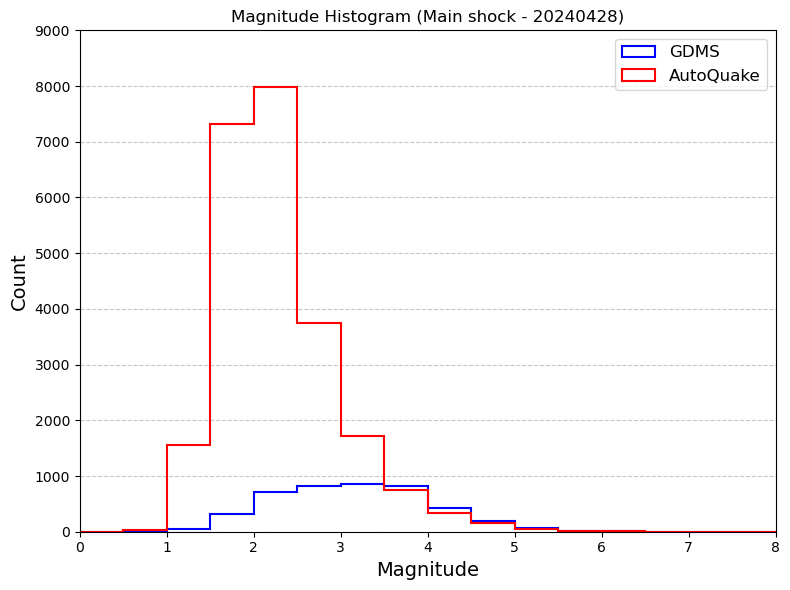

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
gdms_catalog = Path('/home/patrick/Work/Hualien0403/CWA/GDMS_0403_0428.csv')
autoquake_catalog = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events_0403_0428.csv')

fig, ax = plt.subplots(figsize=(8, 6))
df1 = pd.read_csv(gdms_catalog)
df2 = pd.read_csv(autoquake_catalog)
bins = [x * 0.5 for x in range(17)]
# Histogram for df1
ax.hist(
    df1['magnitude'], 
    bins=bins, 
    histtype='step', 
    color='blue', 
    linewidth=1.5, 
    label='GDMS'
)

# Histogram for df2
ax.hist(
    df2['magnitude'], 
    bins=bins, 
    histtype='step', 
    color='red', 
    linewidth=1.5, 
    label='AutoQuake'
)

# Customize plot
ax.set_xlabel('Magnitude', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlim(0, 8)  # Adjust x-axis limits to match bins
ax.set_ylim(0, 9000)  # Adjust y-axis limits
ax.set_title('Magnitude Histogram (Main shock - 20240428)')
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('/home/patrick/Work/Hualien0403/Paper/mag.png', dpi=300, bbox_inches='tight')

### Magnitude frequency

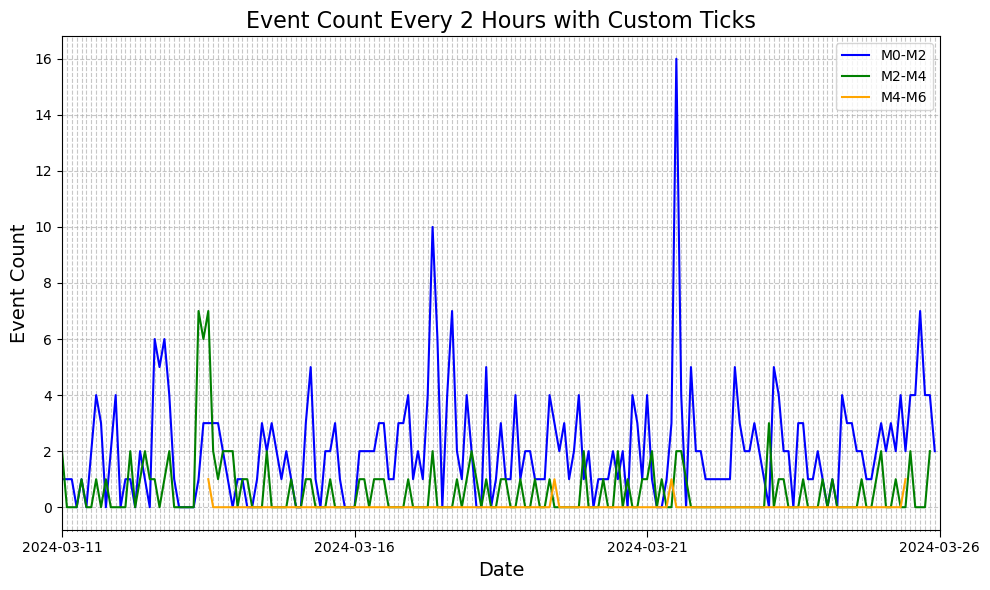

In [13]:
import math
import pandas as pd
from pathlib import Path
from pyproj import Geod
from autoquake.visualization._plot_base import catalog_filter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

def mag_judge(mag: float):
    mag_map = {
        (0, 2): 'M0-M2',
        (2, 4): 'M2-M4',
        (4, 6): 'M4-M6',
        (6, 8): 'M6-M8'
    }
    # Find the appropriate size based on the magnitude
    for mag_range, interval in mag_map.items():
        if mag_range[0] <= mag < mag_range[1]:
            return interval
    # Default size if magnitude is outside defined ranges
    

# df = catalog_filter(df, catalog_range=catalog_range, h3dd_mode=False)
start_time='2024-03-11T00:00:00'
end_time='2024-03-26T00:00:00'
mag_events = Path(
    '/home/patrick/Work/Hualien0403/only_seismometer_new/20240301_main_eq/20240301_20240417_mag_catalog.csv'
)

catalog_filter_ = {
    'min_lon': 121.0,
    'max_lon': 122.25,
    'min_lat': 23.5,
    'max_lat': 24.5,
    'min_depth': 0,
    'max_depth': 60,
}

df = pd.read_csv(mag_events)
df['datetime'] = pd.to_datetime(df['time'])
df = catalog_filter(df, catalog_range=catalog_filter_, h3dd_mode=False)
df = df[
    (df['datetime'] >= pd.to_datetime(start_time)) 
    & (df['datetime'] <= pd.to_datetime(end_time))
]
df['mag_label'] = df['magnitude'].apply(mag_judge)

fig, ax = plt.subplots(figsize=(10, 6))
for _, mag_df in df.groupby(df['mag_label']):

    df_counts = mag_df.resample('2h', on='datetime').size().reset_index(name='count')
    color_map = {
        'M0-M2': 'blue',
        'M2-M4': 'green',
        'M4-M6': 'orange',
        'M6-M8': 'red'
    }
    # Plot the result
    ax.plot(df_counts['datetime'], df_counts['count'], linestyle='-', color=color_map[mag_df['mag_label'].iloc[0]], label=mag_df['mag_label'].iloc[0])

# Set major ticks as one day and minor ticks as 2 hours
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Major ticks: one day
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))  # Minor ticks: every 2 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format major tick labels as dates
# plt.xticks(rotation=45, ha='right')
# Customize appearance
ax.tick_params(axis='x', which='major', length=5, labelsize=10)  # Show labels for major ticks
ax.tick_params(axis='x', which='minor', length=1, labelbottom=False)  # No labels for minor ticks
ax.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))  # Set x-axis limits
# Add labels and title
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Event Count', fontsize=14)
ax.set_title('Event Count Every 2 Hours with Custom Ticks', fontsize=16)
ax.grid(which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Mag stackplot

/tmp/ipykernel_200270/1953944054.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resampled = df.groupby(by=['mag_group', pd.Grouper(key='utctime', freq=time_freq)]).size().unstack(level=0, fill_value=0)


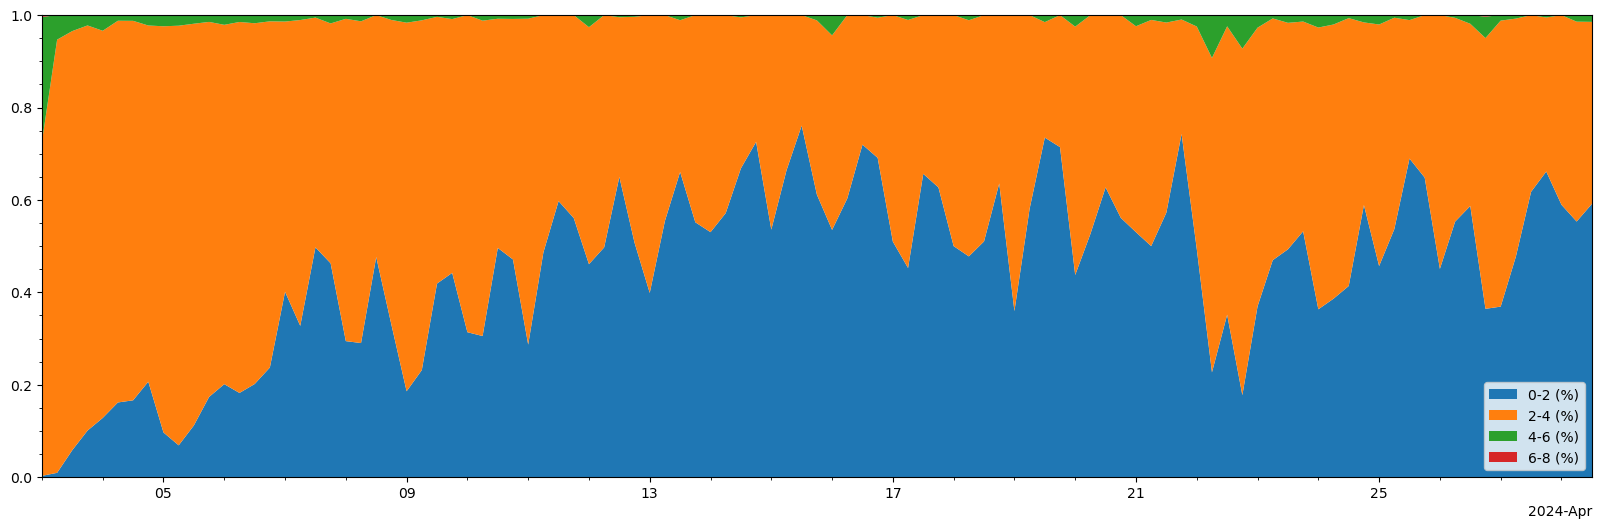

In [3]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter


def mag_stackplot_percentage(
        mag_events: Path,
        time_freq='12H',
        starttime='2024-04-02T23:58:00',
        endtime='2024-04-28T12:00:00',
        mag_bins=[0, 2, 4, 6, 8],
        mag_labels=['0-2', '2-4', '4-6', '6-8']
        ):
    """Plot the percentage of the specific time period"""
    df = pd.read_csv(mag_events)
    df['utctime'] = pd.to_datetime(df['time'])
    df['mag_group'] = pd.cut(df['magnitude'], bins=mag_bins, labels=mag_labels)
    resampled = df.groupby(by=['mag_group', pd.Grouper(key='utctime', freq=time_freq)]).size().unstack(level=0, fill_value=0)

    # label_index = [i for i in range(len(mag_labels))]
    resampled['total'] = resampled.apply(lambda row: row[mag_labels[0]] + row[mag_labels[1]] + row[mag_labels[2]] + row[mag_labels[3]], axis=1)
    for i in resampled.columns:
        resampled[f'{i} (%)'] = resampled.apply(lambda row: row[i] / row['total'], axis=1)
    time_index = resampled.index
    mag_labels = ['0-2 (%)', '2-4 (%)', '4-6 (%)', '6-8 (%)']
    event_counts = [resampled[group] for group in mag_labels]

    plt.figure(figsize=(20, 6))
    plt.stackplot(time_index, event_counts, labels=mag_labels)
    plt.legend()
    plt.xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    plt.ylim(0, 1)
    ax = plt.gca()  # Get current axis
    # Configure major ticks (at least 5)
    major_locator = AutoDateLocator(minticks=5, maxticks=10)  # Ensures at least 5 major ticks
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_major_formatter(ConciseDateFormatter(major_locator))

    # Configure minor ticks (at least 5)
    minor_locator = AutoDateLocator(minticks=5, maxticks=10)  # Ensures at least 5 minor ticks
    ax.xaxis.set_minor_locator(minor_locator)
    plt.minorticks_on()

mag_events = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/mag_events.csv')
mag_stackplot_percentage(mag_events, time_freq='6h')

### Plotting the counts of phase picking as line plot 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pathlib import Path
phasenet_picks = Path('/home/patrick/Work/Hualien0403/Paper/20240401_20240428/picks_phasenet/20240401_20240428/picks.csv')
df_phasenet = pd.read_csv(phasenet_picks)
df_phasenet['time'] = pd.to_datetime(df_phasenet['phase_time'])
station_list = df_phasenet['station_id'].unique() # np.array
total_sta = len(station_list)
num_rows = 7
if total_sta % num_rows == 0:
    num_columns = total_sta // num_rows
else:
    num_columns = (total_sta // num_rows) + 1
fig = plt.figure(figsize=(60, 32))
gs = GridSpec(nrows=num_rows, ncols=num_columns, figure=fig)
for i, station in enumerate(station_list):
    # dataframe processing
    df = df_phasenet.loc[df_phasenet['station_id'] == station]
    counts = df.groupby(by=pd.Grouper(key='time', freq='12h')).size()
    x = counts.index
    y = counts.values
    n = i // 7
    m = i % 7
    ax = fig.add_subplot(gs[m, n])
    ax.plot(x, y)
    ax.set_title(station)

### Plotting Aso picks and PhaseNet picks ratio

In [ ]:
df_gamma_picks = pd.read_csv(gamma_picks)
df_gamma_picks['time'] = pd.to_datetime(df_gamma_picks['phase_time'])
df_test = df_gamma_picks.groupby(
    [pd.Grouper(key='time', freq='12h'), df_gamma_picks['event_index'] == -1]
    ).size().unstack(level=1, fill_value=0)

x = df_test.index
y = df_test[False] / (df_test[True] + df_test[False])
plt.figure(figsize=(15, 6))
plt.plot(x, y)
plt.xlabel('Datetime (interval=12h)')
plt.ylabel('Percentage (%)')
plt.title('Associated picks / All PhaseNet picks')
plt.savefig('/home/patrick/Work/Hualien0403/Paper/aso_all_percentage.png', dpi=300)

### Extract the newest PZ

In [15]:
from pathlib import Path
import shutil
output = Path('/home/patrick/Work/Hualien_2018/pz_dir/real_PZ')
output.mkdir(exist_ok=True, parents=True)
pz = Path('/home/patrick/Work/Hualien_2018/pz_dir/PZ')
tester = set()
for i in pz.iterdir():
    sta = str(i.name).split('_')[3]
    azi = str(i.name).split('_')[4]
    tester.add(f'{sta}_{azi}')
    
for i in tester:
    files = pz.glob(f'*{i}*')
    year_list = []
    for file in files:
        print(file.name)
        num = int(str(file.name).split('_')[6][:4])
        year_list.append(num)
    
    target_file = list(pz.glob(f'*{i}*_{max(year_list)}.*'))[0]
    shutil.copy(target_file, output)

SAC_PZs_TW_SSP_HN1_00_2011.363.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_EYUL_HNN_10_2014.219.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_SMS_HN2_00_2015.338.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_WDJ_HNE_10_2013.018.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_HOPB_HHE__2014.241.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_CHY_HNN_10_2009.349.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_SLIU_HNZ_10_2014.209.00.00.00.0000_2017.079.24.60.60.99999
SAC_PZs_TW_SLIU_HNZ_00_2017.079.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_SLIU_HNZ_10_2017.079.00.00.00.0000_2599.365.23.59.59.99999
SAC_PZs_TW_SLIU_HNZ_00_2014.209.00.00.00.0000_2017.079.24.60.60.99999
SAC_PZs_TW_PHUB_BLZ__2009.048.07.11.20.0000_2599.365.23.59.59.99999
SAC_PZs_TW_PHUB_BLZ__2003.168.03.18.00.0000_2009.048.07.11.20.99999
SAC_PZs_TW_MATB_BHN__2000.178.10.09.58.6410_2005.005.02.49.40.99999
SAC_PZs_TW_MATB_BHN__2005.005.02.49.40.0000_2008.198.03.25.59.99999
SAC_PZs_TW_MATB_BHN__2009.113.07.3

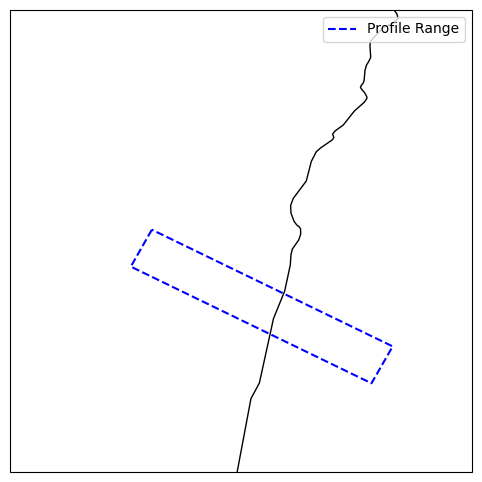

In [26]:
fig, geo_ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
geo_ax.set_extent([121.0, 122, 23.5, 24.5], crs=ccrs.PlateCarree())
geo_ax.coastlines()
# 在地圖上添加剖面矩形
add_profile_rectangle(
    geo_ax,
    fault_start,
    fault_end,
    length,
    width,
    fault_azimuth,
    color='blue',
    linestyle='--',
    linewidth=1.5,
    label='Profile Range'
)

# 添加圖例
geo_ax.legend(loc='upper right')

# 顯示地圖
plt.show()